In [1]:
import numpy as np

In [2]:
X_seen=np.load('data/AwA_python/X_seen.npy',encoding='bytes',allow_pickle=True) #	(40 x N_i x D): 40 feature matrices. X_seen[i] is the N_i x D feature matrix of seen class i


In [3]:
# Mean will store the mean of each class so shape of Mean is (40,4096,)
Mean = np.zeros((40,4096))

for i in range(40):
    Mean[i] = np.mean(X_seen[i],axis=0)
    if i%5==0:
        print(Mean[i].shape)

(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)
(4096,)


In [4]:
Mean.shape

(40, 4096)

In [5]:
A=np.load('data/AwA_python/class_attributes_seen.npy',encoding='bytes',allow_pickle=True) 
print(A.shape)

(40, 85)


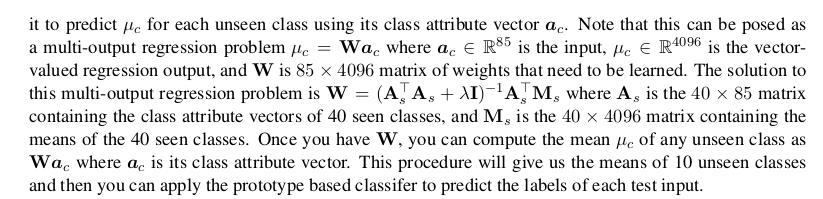

In [6]:
Mean = Mean.astype(float)
A = A.astype(float)

In [7]:
lamda = 0.1

M_l = np.matmul(A.T,A) + lamda*np.eye(85,85)

M_l = np.linalg.inv(M_l)

M_r = np.matmul(A.T,Mean)

W = np.matmul(M_l,M_r)


In [9]:
print(W.shape)

(85, 4096)


In [8]:
UAttr=np.load('data/AwA_python/class_attributes_unseen.npy',encoding='bytes',allow_pickle=True) 
print(UAttr.shape)

(10, 85)


In [11]:
UMean = np.matmul(UAttr,W)
UMean.shape

(10, 4096)

In [12]:
Xtest=np.load('data/AwA_python/Xtest.npy',encoding='bytes',allow_pickle=True)
Ytest=np.load('data/AwA_python/Ytest.npy',encoding='bytes',allow_pickle=True)

print("Shape of Xtest ",Xtest.shape)
print("Shape of Ytest ",Ytest.shape)

Shape of Xtest  (6180, 4096)
Shape of Ytest  (6180, 1)


In [13]:
N = Xtest.shape[0]

print("N is ",N)

D = np.ones((N,10),dtype=float)

for i in range(N):
    xi = Xtest[i]
    for uc in range(UMean.shape[0]):
        D[i][uc] = np.linalg.norm(xi-UMean[uc])

print("Shape of D is ",D.shape)


N is  6180
Shape of D is  (6180, 10)


In [14]:
D

array([[1.0999798 , 1.14280803, 0.90744276, ..., 1.11682631, 1.02073689,
        0.83440339],
       [1.03669167, 1.12849048, 1.0564976 , ..., 1.05463176, 0.9361465 ,
        1.03713659],
       [0.88870587, 1.01574301, 0.89131725, ..., 1.13214117, 0.98078223,
        1.02775578],
       ...,
       [1.01896909, 1.03586898, 0.93055606, ..., 1.00973779, 0.90574771,
        0.8029739 ],
       [0.96624034, 0.96256934, 0.9469784 , ..., 1.02179981, 0.91276482,
        0.97476478],
       [1.07882195, 1.17862764, 1.11519561, ..., 0.9144321 , 0.94151008,
        1.05999056]])

In [16]:
Ypredicted = np.argmin(D,axis = 1) + 1

In [15]:
Ytrue = Ytest.reshape(-1,)
print(Ytrue.shape)
Ytrue

(6180,)


array([ 4.,  6.,  1., ..., 10.,  2.,  8.])

In [17]:
equal = (Ypredicted == Ytrue)
C = np.sum(equal)
C/N

0.5954692556634305

In [18]:
lamda_set = [0.01, 0.1, 1, 10, 20, 50, 100]

for lamda in lamda_set:
    # calculate W
    M_l = np.matmul(A.T,A) + lamda*np.eye(85,85)

    M_l = np.linalg.inv(M_l)

    M_r = np.matmul(A.T,Mean)

    W = np.matmul(M_l,M_r)
    # ------------------
    # Get the Unseen_means
    UMean = np.matmul(UAttr,W)

    # generate the predictions

    N = Xtest.shape[0]

    D = np.ones((N,10),dtype=float)

    for i in range(N):
        xi = Xtest[i]
        for uc in range(UMean.shape[0]):
            D[i][uc] = np.linalg.norm(xi-UMean[uc])

    Ypredicted = np.argmin(D,axis = 1) + 1

    equal = (Ypredicted == Ytrue)
    C = np.sum(equal)

    print(f"Accuracy obtained from lambda = {lamda} is {C/N}")
    

Accuracy obtained from lambda = 0.01 is 0.580906148867314
Accuracy obtained from lambda = 0.1 is 0.5954692556634305
Accuracy obtained from lambda = 1 is 0.6739482200647249
Accuracy obtained from lambda = 10 is 0.7328478964401295
Accuracy obtained from lambda = 20 is 0.7168284789644013
Accuracy obtained from lambda = 50 is 0.6508090614886731
Accuracy obtained from lambda = 100 is 0.5647249190938511
